# Artio Notebook
This notebook is a draft on one can interact with the artio-insight database in order to get some meangingful insights

In [106]:
import pandas as pd
import psycopg2
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt

Create the correct data source and env variables

In [107]:
load_dotenv(".env")

db_host = os.getenv("DB_HOST")
db_port = os.getenv("DB_PORT")
db_user = os.getenv("DB_USERNAME")
db_password = os.getenv("DB_PASSWORD")
db_name = os.getenv("DB_DATABASE")

conn = psycopg2.connect(
    dbname=db_name,
    user=db_user,
    password=db_password,
    host=db_host,
    port=db_port
)

From here on we can start to actually query the data and do some visualizations

In [108]:
%%sql
SELECT n.nip_id, n.nip_name, r.relay_id, r.relay_id
FROM udm.relaynip AS rn
    LEFT JOIN udm.relay r
        ON r.relay_id = rn.relay_id
    LEFT JOIN udm.nip n
        ON n.nip_id = rn.nip_id

,nip_id,nip_name,relay_id,relay_id.1
0,49765,1,50168.0,50168.0
1,49767,2,50168.0,50168.0
2,49771,4,50168.0,50168.0
3,49781,9,50168.0,50168.0
4,49783,11,50168.0,50168.0
...,...,...,...,...
8694,49926,56,153198.0,153198.0
8695,49927,57,153198.0,153198.0
8696,49928,58,153198.0,153198.0
8697,49929,59,153198.0,153198.0


In [121]:
grouped = df_relaynip.groupby("nip_name")['relay_id'].count()

C:\Users\mikai\AppData\Local\Temp\ipykernel_81532\4036740868.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


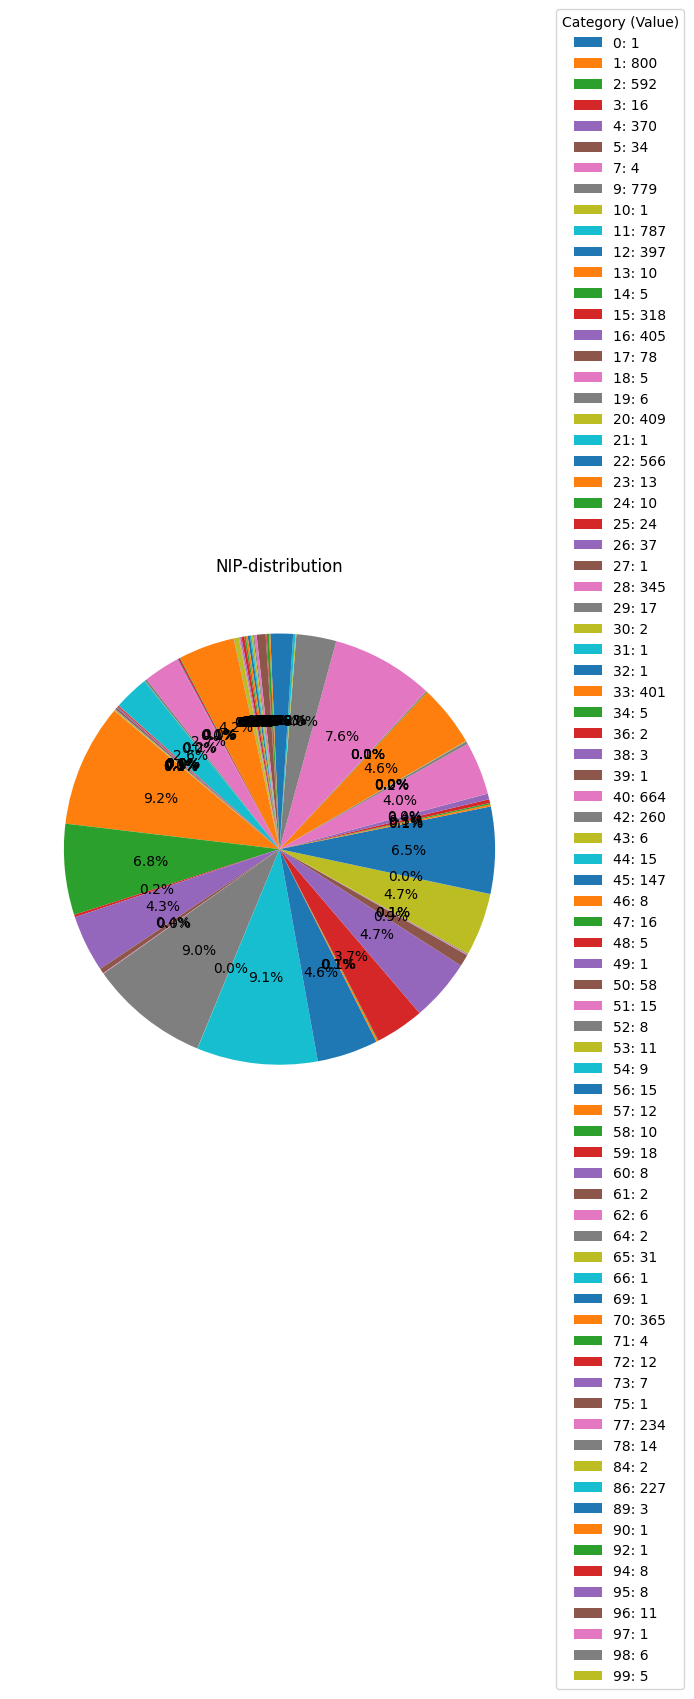

In [122]:
fig, ax = plt.subplots(figsize=(7, 7))

# Draw the pie chart; turn off labels for a cleaner legend
wedges, texts, autotexts = ax.pie(
    grouped,
    labels=None,  # No labels on slices
    autopct='%1.1f%%',
    startangle=140
)

# Create legend labels with category and value
legend_labels = [f"{cat}: {val}" for cat, val in zip(grouped.index, grouped.values)]

# Place legend on the right with title
ax.legend(wedges, legend_labels, title="Category (Value)", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('NIP-distribution')
plt.tight_layout()
plt.show()

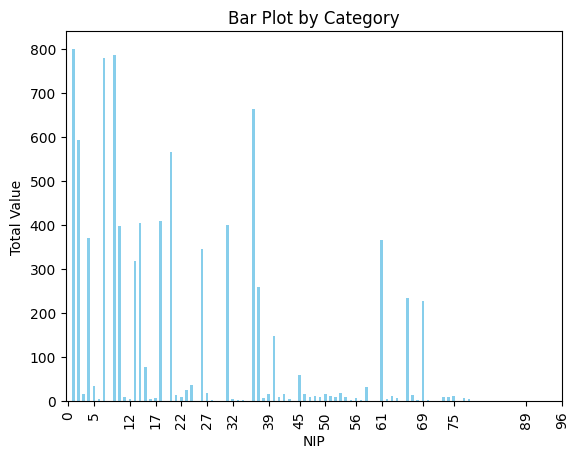

<Figure size 640x480 with 0 Axes>

In [151]:
grouped.plot(kind='bar', color='skyblue', width=0.5, xticks=grouped.index[::5])

plt.xlabel('NIP')
plt.ylabel('Total Value')
plt.title('Bar Plot by Category')
plt.xticks(rotation=90)  # Optional: rotates category labels horizontally
f = plt.figure()
plt.show()